In [4]:
!pip install APIMakeSens
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from MakeSens import MakeSens

In [88]:
fecha_inicio = "2023-08-03 00:00:00"
fecha_fin = "2023-08-17 00:00:00"
estacion = "mE1_00008"
frecuencia = "1T"
data = MakeSens.download_data(estacion, fecha_inicio, fecha_fin, frecuencia)
data

,ts,humedad,humedad2,iluminancia,pm10_1,pm10_1_AE,pm10_2,pm10_2_AE,pm1_1,pm1_1_AE,...,pm_n_10_0_2,pm_n_1_0_1,pm_n_1_0_2,pm_n_2_5_1,pm_n_2_5_2,pm_n_5_0_1,pm_n_5_0_2,presion,temperatura,temperatura2
0,2023-08-03 00:00:00,37.669041,42.561989,274.0,16.0,16.0,15.0,15.0,13.0,13.0,...,0.0,92.0,100.0,0.0,11.0,0.0,0.0,675.398254,38.018097,37.133976
1,2023-08-03 00:04:00,37.032421,41.998932,278.0,16.0,16.0,16.0,16.0,11.0,11.0,...,0.0,94.0,97.0,6.0,7.0,2.0,0.0,656.151489,38.465343,37.497139
2,2023-08-03 00:07:00,37.374500,42.478065,279.0,14.0,14.0,15.0,15.0,9.0,9.0,...,0.0,76.0,73.0,2.0,6.0,2.0,1.0,666.744507,38.223728,37.216755
3,2023-08-03 00:09:00,37.326153,42.368198,275.0,16.0,16.0,15.0,15.0,12.0,12.0,...,0.0,92.0,89.0,4.0,7.0,2.0,1.0,660.434937,38.367668,37.344929
4,2023-08-03 00:11:00,37.225590,42.441444,276.0,17.0,17.0,14.0,14.0,11.0,11.0,...,1.0,98.0,77.0,4.0,7.0,4.0,3.0,656.289978,38.465343,37.401009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7230,2023-08-16 23:49:00,39.024628,44.745556,273.0,6.0,6.0,6.0,6.0,5.0,5.0,...,0.0,34.0,29.0,0.0,5.0,0.0,0.0,741.753052,36.357655,35.093842
7231,2023-08-16 23:51:00,39.060333,45.142292,269.0,7.0,7.0,6.0,6.0,5.0,5.0,...,0.0,38.0,30.0,2.0,4.0,0.0,2.0,746.616394,36.234276,35.024414
7232,2023-08-16 23:53:00,39.575283,45.523766,271.0,4.0,4.0,5.0,5.0,3.0,3.0,...,0.0,26.0,22.0,0.0,4.0,0.0,0.0,767.101196,35.699654,34.543755
7233,2023-08-16 23:56:00,38.976231,44.840160,275.0,4.0,4.0,3.0,3.0,4.0,4.0,...,0.0,26.0,10.0,0.0,1.0,0.0,0.0,766.329163,35.720215,34.404900


In [89]:
columnas = ["pm10_1", "pm10_2", 'ts']
pm_data = data[columnas]

pm_data = pm_data.set_index('ts')
pm_data.index = pd.to_datetime(pm_data.index)
pm_data


,pm10_1,pm10_2
ts,,
2023-08-03 00:00:00,16.0,15.0
2023-08-03 00:04:00,16.0,16.0
2023-08-03 00:07:00,14.0,15.0
2023-08-03 00:09:00,16.0,15.0
2023-08-03 00:11:00,17.0,14.0
...,...,...
2023-08-16 23:49:00,6.0,6.0
2023-08-16 23:51:00,7.0,6.0
2023-08-16 23:53:00,4.0,5.0


In [90]:
columnas = pm_data.columns
for col in columnas:
  pm_data[col] = pm_data[col].where(pm_data[col]<120, np.nan)

In [91]:
pm_data['mean'] = pm_data[['pm10_1','pm10_2']].mean(axis=1)    # 1ra forma
pm_data

,pm10_1,pm10_2,mean
ts,,,
2023-08-03 00:00:00,16.0,15.0,15.5
2023-08-03 00:04:00,16.0,16.0,16.0
2023-08-03 00:07:00,14.0,15.0,14.5
2023-08-03 00:09:00,16.0,15.0,15.5
2023-08-03 00:11:00,17.0,14.0,15.5
...,...,...,...
2023-08-16 23:49:00,6.0,6.0,6.0
2023-08-16 23:51:00,7.0,6.0,6.5
2023-08-16 23:53:00,4.0,5.0,4.5


In [92]:
pm_data['hora'] = pm_data.index.hour.values # Agregamos una columna "hora" al DataFrame temp que contenga la hora de cada dato
pm_data.head()

,pm10_1,pm10_2,mean,hora
ts,,,,
2023-08-03 00:00:00,16.0,15.0,15.5,0
2023-08-03 00:04:00,16.0,16.0,16.0,0
2023-08-03 00:07:00,14.0,15.0,14.5,0
2023-08-03 00:09:00,16.0,15.0,15.5,0
2023-08-03 00:11:00,17.0,14.0,15.5,0


In [93]:
pm_data_h = pm_data.groupby(pm_data['hora']).mean()
pm_data_hstd = pm_data.groupby(pm_data['hora']).std()
pm_data_h.head(24)

,pm10_1,pm10_2,mean
hora,,,
0,13.680272,12.935154,13.319728
1,15.665574,14.396721,15.031148
2,16.232026,14.813725,15.522876
3,15.096220,13.580756,14.338488
4,14.328767,12.893836,13.611301
5,12.927393,11.650165,12.288779
6,12.077966,10.966216,11.527027
7,12.327586,11.000000,11.663793
8,11.673981,10.507837,11.090909


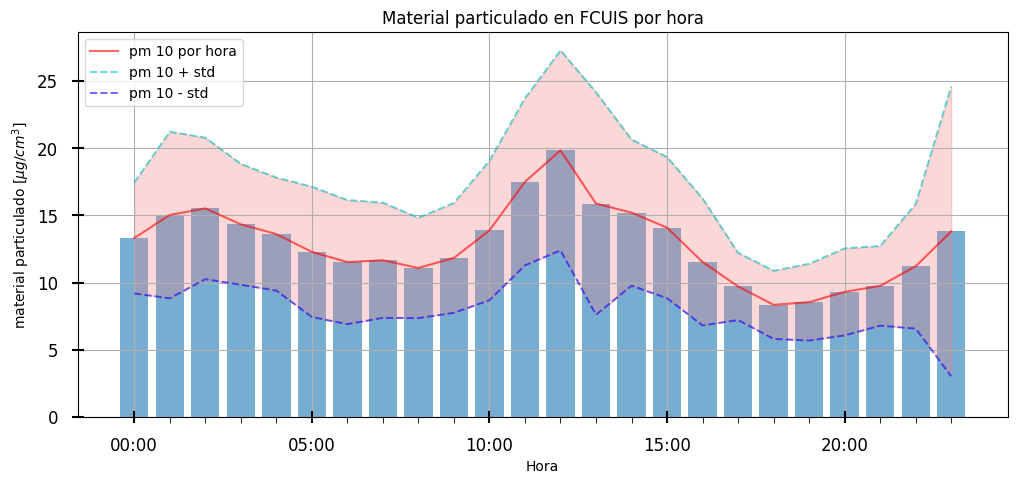

In [94]:
fig = plt.figure(figsize=(12, 5))
ax = fig.gca()

#Graficamos los datos
plt.bar(pm_data_h.index, pm_data_h['mean'], alpha=0.6)
plt.plot(pm_data_h['mean'], '-r',  label="pm 10 por hora", alpha=0.6)
plt.plot(pm_data_h['mean']+pm_data_hstd['mean'],  '--c', label="pm 10 + std",         alpha=0.6,lw=1.4)
plt.plot(pm_data_h['mean']-pm_data_hstd['mean'],  '--b', label="pm 10 - std",         alpha=0.6,lw=1.4)

#Coloreamos el area entre las lineas de maximo y minimo
plt.fill_between(pm_data_h['mean'].index, pm_data_h['mean']+pm_data_hstd['mean'], pm_data_h['mean']-pm_data_hstd['mean'], alpha=0.3, color="lightcoral")

#Formateamos el eje de fechas para que se vea mejor
ax.tick_params(which='major', pad=10, length=8, labelsize=12, direction="inout", width=1.5)
ax.tick_params(which='minor', length=4)
ax.set_xticks(range(0,24,5))
ax.set_xticks(range(0,24,1), minor=True)
ax.set_xticklabels(["00:00", "05:00", "10:00", "15:00", "20:00"])

#Agregamos la leyenda, los titulos y la grilla
plt.ylabel("material particulado [$\mu g/cm^3$]")
plt.xlabel("Hora")
plt.title("Material particulado en FCUIS por hora")
plt.grid(True)
plt.legend()

plt.show()

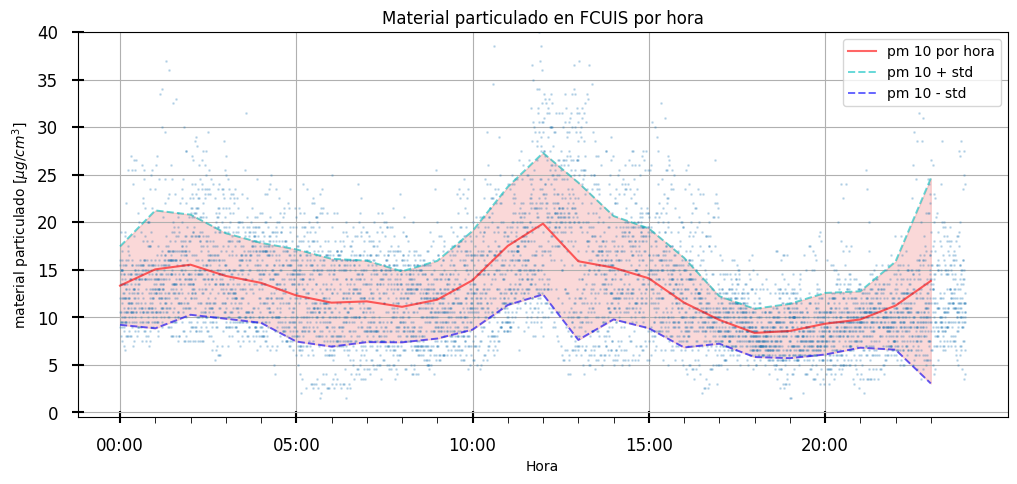

In [103]:
fig = plt.figure(figsize=(12, 5))
ax = fig.gca()

dates = []
for date in pm_data.index.to_pydatetime():
    dates.append( float(date.strftime('%H')) + float(date.strftime('%M'))/60 + float(date.strftime('%S'))/3600)

#Graficamos los datos
plt.plot(dates, pm_data['mean'], 'o',ms=1, alpha=0.2)
plt.plot(pm_data_h['mean'], '-r',  label="pm 10 por hora", alpha=0.6)
plt.plot(pm_data_h['mean']+pm_data_hstd['mean'],  '--c', label="pm 10 + std",         alpha=0.6,lw=1.4)
plt.plot(pm_data_h['mean']-pm_data_hstd['mean'],  '--b', label="pm 10 - std",         alpha=0.6,lw=1.4)

#Coloreamos el area entre las lineas de maximo y minimo
plt.fill_between(pm_data_h['mean'].index, pm_data_h['mean']+pm_data_hstd['mean'], pm_data_h['mean']-pm_data_hstd['mean'], alpha=0.3, color="lightcoral")

#Formateamos el eje de fechas para que se vea mejor
ax.tick_params(which='major', pad=10, length=8, labelsize=12, direction="inout", width=1.5)
ax.tick_params(which='minor', length=4)
ax.set_xticks(range(0,24,5))
ax.set_xticks(range(0,24,1), minor=True)
ax.set_xticklabels(["00:00", "05:00", "10:00", "15:00", "20:00"])

#Agregamos la leyenda, los titulos y la grilla
plt.ylabel("material particulado [$\mu g/cm^3$]")
plt.xlabel("Hora")
plt.title("Material particulado en FCUIS por hora")
plt.grid(True)
plt.legend()
plt.ylim(-0.5,40)
plt.show()

In [96]:
import seaborn as sns

In [97]:
pm_data_hmax = pm_data.groupby(pm_data['hora']).max()
pm_data_hmin = pm_data.groupby(pm_data['hora']).min()

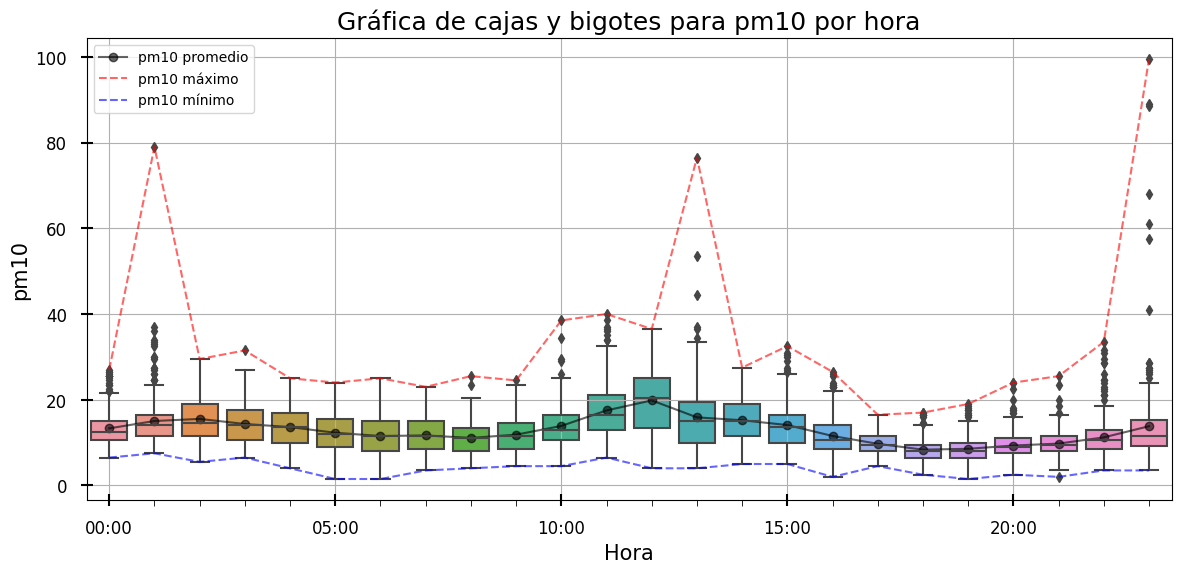

In [99]:
# Generamos la figura
fig = plt.figure(figsize=(14, 6))
ax = fig.gca()

# Diagrama cajas y bigotes
sns.boxplot(data = pm_data, x='hora', y='mean', ax=ax)

# Otros graficos
plt.plot(pm_data_h['mean'],     '-ok', label="pm10 promedio", alpha=0.6)
plt.plot(pm_data_hmax['mean'], '--r', label="pm10 máximo",   alpha=0.6)
plt.plot(pm_data_hmin['mean'], '--b', label="pm10 mínimo",   alpha=0.6)

# Formateamos el eje de fechas para que se vea mejor
ax.tick_params(which='major', pad=10, length=8, labelsize=12, direction="inout", width=1.5)
ax.tick_params(which='minor', length=4)
ax.set_xticks(range(0,24,5))
ax.set_xticks(range(0,24,1), minor=True)
ax.set_xticklabels(["00:00", "05:00", "10:00", "15:00", "20:00"], fontsize=12)

# Agregamos la leyenda, los titulos y la grilla
plt.ylabel("pm10", fontsize=15)
plt.xlabel("Hora", fontsize=15)
plt.title("Gráfica de cajas y bigotes para pm10 por hora", fontsize=18)
plt.legend()
plt.grid(True)

plt.show()